In [55]:
import illustris_python as il
import requests
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os

In [56]:
from dotenv import load_dotenv
load_dotenv()

True

In [57]:

baseUrl = 'http://www.tng-project.org/api/TNG-Cluster'
headers = {"api-key":os.getenv('API_KEY')}
savedir = 'tng_cache/'

def get(path, params=None):
    # make HTTP GET request to path
    r = requests.get(path, params=params, headers=headers)

    # raise exception if response code is not HTTP SUCCESS (200)
    r.raise_for_status()

    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically

    if 'content-disposition' in r.headers:
        filename = savedir + r.headers['content-disposition'].split("filename=")[1]
        with open(filename, 'wb') as f:
            f.write(r.content)
        return filename # return the filename string

    return r

In [58]:
sim = get(baseUrl)
sim

{'name': 'TNG-Cluster',
 'description': 'Main high-resolution TNG-Cluster simulation suite (virtual box), with the full fiducial TNG physics model.',
 'name_alt': 'L680n8192TNG',
 'boxsize': 680000.0,
 'z_start': 127.0,
 'z_final': 0.0,
 'cosmology': 'Planck2015',
 'omega_0': 0.3089,
 'omega_L': 0.6911,
 'omega_B': 0.0486,
 'hubble': 0.6774,
 'physics_model': 'Fiducial TNG Model',
 'has_cooling': True,
 'has_starformation': True,
 'has_winds': True,
 'has_blackholes': True,
 'mass_gas': 0.000771495,
 'mass_dm': 0.00413211373831018,
 'softening_dm_comoving': 2.0,
 'softening_stars_comoving': 2.0,
 'softening_blackholes_comoving': 4.0,
 'softening_gas_comoving': 2.0,
 'softening_dm_max_phys': 1.0,
 'softening_stars_max_phys': 1.0,
 'softening_blackholes_max_phys': 4.0,
 'softening_gas_max_phys': 1.0,
 'softening_gas_factor': 2.5,
 'softening_gas_comoving_min': 0.25,
 'num_dm': 549755813888,
 'num_tr_mc': 15416383432,
 'num_tr_vel': 0,
 'longids': False,
 'is_uniform': True,
 'is_zoom': F

In [38]:
snaps = get(sim['snapshots'])
snaps

[{'number': 0,
  'redshift': 20.0464909888075,
  'num_groups_subfind': 865,
  'url': 'http://www.tng-project.org/api/TNG-Cluster/snapshots/0/'},
 {'number': 1,
  'redshift': 14.9891732400424,
  'num_groups_subfind': 6483,
  'url': 'http://www.tng-project.org/api/TNG-Cluster/snapshots/1/'},
 {'number': 2,
  'redshift': 11.9802133153003,
  'num_groups_subfind': 170903,
  'url': 'http://www.tng-project.org/api/TNG-Cluster/snapshots/2/'},
 {'number': 3,
  'redshift': 10.9756432941379,
  'num_groups_subfind': 452815,
  'url': 'http://www.tng-project.org/api/TNG-Cluster/snapshots/3/'},
 {'number': 4,
  'redshift': 9.99659046618633,
  'num_groups_subfind': 1065292,
  'url': 'http://www.tng-project.org/api/TNG-Cluster/snapshots/4/'},
 {'number': 5,
  'redshift': 9.38877127194055,
  'num_groups_subfind': 1716146,
  'url': 'http://www.tng-project.org/api/TNG-Cluster/snapshots/5/'},
 {'number': 6,
  'redshift': 9.00233985416247,
  'num_groups_subfind': 2272824,
  'url': 'http://www.tng-project.or

In [39]:
snap = get( snaps[-1]['url'] )
snap

{'simulation': 'http://www.tng-project.org/api/TNG-Cluster/',
 'number': 99,
 'redshift': 0.0,
 'num_gas': 14969664891,
 'num_dm': 14829431232,
 'num_trmc': 15416383432,
 'num_stars': 1067549783,
 'num_bhs': 430359,
 'num_groups_fof': 19453039,
 'num_groups_subfind': 10378451,
 'num_groups_rockstar': 0,
 'filesize_snapshot': 4928426793596.0,
 'filesize_groupcat': 16110992699.0,
 'filesize_rockstar': 0.0,
 'url': 'http://www.tng-project.org/api/TNG-Cluster/snapshots/99/',
 'subhalos': 'http://www.tng-project.org/api/TNG-Cluster/snapshots/99/subhalos/',
 'vis': {'groupcat_sfms': 'http://www.tng-project.org/api/TNG-Cluster/snapshots/99/subhalos/plot.png?xQuant=mstar2_log&yQuant=ssfr&xlim=9.0%2C11.0',
  'groupcat_sizemass': 'http://www.tng-project.org/api/TNG-Cluster/snapshots/99/subhalos/plot.png?xQuant=mstar2_log&yQuant=size_stars',
  'groupcat_mz_gas': 'http://www.tng-project.org/api/TNG-Cluster/snapshots/99/subhalos/plot.png?xQuant=mstar2_log&yQuant=Z_gas',
  'groupcat_mz_stars': 'http

In [40]:
subs = get( snap['subhalos'], {'limit':50, 'order_by':'-mass_stars'} )
subs

{'count': 10378451,
 'next': 'http://www.tng-project.org/api/TNG-Cluster/snapshots/99/subhalos/?limit=50&offset=50&order_by=-mass_stars',
 'previous': None,
 'results': [{'id': 4680430,
   'sfr': 6.98751,
   'mass_log_msun': 14.823941436818016,
   'url': 'http://www.tng-project.org/api/TNG-Cluster/snapshots/99/subhalos/4680430/'},
  {'id': 2930523,
   'sfr': 0.100453,
   'mass_log_msun': 15.20857685911439,
   'url': 'http://www.tng-project.org/api/TNG-Cluster/snapshots/99/subhalos/2930523/'},
  {'id': 845400,
   'sfr': 0.0373764,
   'mass_log_msun': 15.405578694454283,
   'url': 'http://www.tng-project.org/api/TNG-Cluster/snapshots/99/subhalos/845400/'},
  {'id': 8143526,
   'sfr': 320.685,
   'mass_log_msun': 14.61170512428078,
   'url': 'http://www.tng-project.org/api/TNG-Cluster/snapshots/99/subhalos/8143526/'},
  {'id': 6419490,
   'sfr': 1924.89,
   'mass_log_msun': 14.651030081787413,
   'url': 'http://www.tng-project.org/api/TNG-Cluster/snapshots/99/subhalos/6419490/'},
  {'id':

In [41]:
sub = get( subs['results'][-1]['url'] )
sub

{'snap': 99,
 'id': 6878279,
 'bhmdot': 0.0337376,
 'cm_x': 32693.5,
 'cm_y': 674148.0,
 'cm_z': 20570.1,
 'gasmetallicity': 0.0397298,
 'gasmetallicityhalfrad': 0.0472337,
 'gasmetallicitymaxrad': 0.0513365,
 'gasmetallicitysfr': 0.0469282,
 'gasmetallicitysfrweighted': 0.0465851,
 'pos_x': 32626.5,
 'pos_y': 674116.0,
 'pos_z': 20582.8,
 'halfmassrad': 364.721,
 'halfmassrad_gas': 436.339,
 'halfmassrad_dm': 695.093,
 'halfmassrad_stars': 10.659,
 'halfmassrad_bhs': 0.0,
 'len': 1670107,
 'len_gas': 982585,
 'len_dm': 604105,
 'len_stars': 28611,
 'len_bhs': 28,
 'mass': 20075.8,
 'mass_gas': 2477.86,
 'mass_dm': 2496.23,
 'mass_stars': 604.422,
 'mass_bhs': 3.53376,
 'massinhalfrad': 378.5,
 'massinhalfrad_gas': 2.52405,
 'massinhalfrad_dm': 0.095039,
 'massinhalfrad_stars': 302.177,
 'massinhalfrad_bhs': 3.35912,
 'massinmaxrad': 179.373,
 'massinmaxrad_gas': 0.710223,
 'massinmaxrad_dm': 0.008264,
 'massinmaxrad_stars': 165.775,
 'massinmaxrad_bhs': 3.35912,
 'massinrad': 607.005,

In [42]:
url = sub['related']['parent_halo'] + "info.json"
parent_fof = get(url)
parent_fof

{'SimulationName': 'L680n8192TNG',
 'SnapshotNumber': 99,
 'InfoType': 'Group',
 'InfoID': 12925051,
 'GroupBHMass': 0.7707715034484863,
 'GroupBHMdot': 0.033797066658735275,
 'GroupCM': [32708.49609375, 674166.8125, 20553.513671875],
 'GroupContaminationFracByMass': 0.7769969701766968,
 'GroupContaminationFracByNumPart': 0.051520563662052155,
 'GroupFirstSub': 6878279,
 'GroupGasMetalFractions': [0.7514222264289856,
  0.24420961737632751,
  0.00048187043284997344,
  0.0001592925691511482,
  0.002136792754754424,
  0.0007315163384191692,
  0.00020899852097500116,
  0.00019661607802845538,
  0.0003065162745770067,
  0.00014658596774097532],
 'GroupGasMetallicity': 0.004368188790977001,
 'GroupLen': 2298752,
 'GroupLenType': [1000081, 1088475, 59125, 0, 151020, 51],
 'GroupMass': 23464.6640625,
 'GroupMassType': [2507.251708984375,
  4497.70263671875,
  15671.0908203125,
  0.0,
  784.6505737304688,
  3.968032121658325],
 'GroupNsubs': 399,
 'GroupOffsetType': [4007499630, 6349110121, 317

In [43]:
parent_fof['InfoID'], parent_fof['GroupCM'], parent_fof['GroupMassType'], parent_fof['GroupSFR'], parent_fof['Group_R_Crit500']

(12925051,
 [32708.49609375, 674166.8125, 20553.513671875],
 [2507.251708984375,
  4497.70263671875,
  15671.0908203125,
  0.0,
  784.6505737304688,
  3.968032121658325],
 23.838449478149414,
 696.9913940429688)

In [49]:
with h5py.File("outputs/dm_proto.hdf5", "w") as f:
    group = f.create_group(str(parent_fof['InfoID']))
    group['GroupCM'] = parent_fof['GroupCM']
    group['GroupMassType'] = parent_fof['GroupMassType']
    group['GroupSFR'] = parent_fof['GroupSFR']
    group['Group_R_Crit500'] = parent_fof['Group_R_Crit500']

In [47]:
out = h5py.File("outputs/dm_proto.hdf5", "r")
print(out['12925051'].keys())
out.close()

<KeysViewHDF5 ['GroupCM', 'GroupMassType', 'GroupSFR', 'Group_R_Crit500']>


In [19]:
cutout_request = {'gas':'Coordinates,Masses,Density,ElectronAbundance,GFM_Metals'}
cutout = get(sub['cutouts']['parent_halo'], cutout_request)
cutout

'tng_cache/cutout_12925051.hdf5'

<KeysViewHDF5 ['Coordinates', 'Density', 'ElectronAbundance', 'GFM_Metals', 'Masses']>


NameError: name 'sub_prog' is not defined

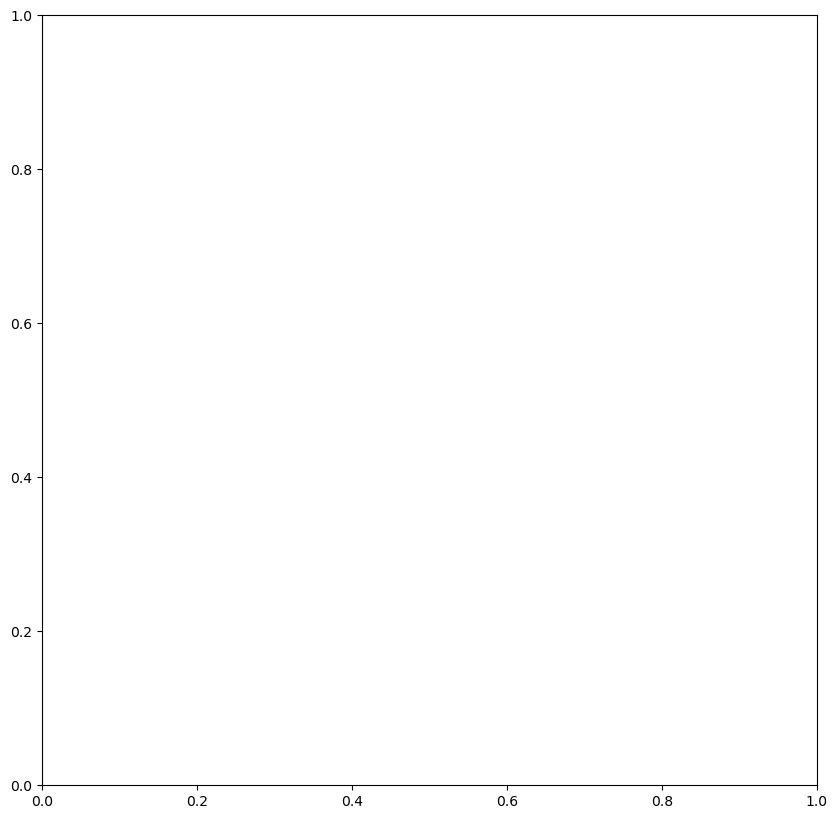

In [48]:
fig, ax = plt.subplots(figsize=(10,10))
with h5py.File(cutout,'r') as f:
    print(f['PartType0'].keys())
    x = f['PartType0']['Coordinates'][:,0] - sub_prog['pos_x']
    y = f['PartType0']['Coordinates'][:,1] - sub_prog['pos_y']
    dens = (f['PartType0']['Masses'][:])

plt.hist2d(x,y,weights=-np.log(dens),bins=[100,100])
plt.xlabel('$\Delta x$ [ckpc/h]')
plt.ylabel('$\Delta y$ [ckpc/h]')
plt.gca().set_aspect('equal')